In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

import statsmodels.formula.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

<Figure size 432x216 with 0 Axes>

In [2]:
output = pd.read_table("C:\\Users\\RAMKUMAR\\Desktop\\Train.txt",delimiter = ",")
output

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21


In [3]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
0           125972 non-null int64
tcp         125972 non-null object
ftp_data    125972 non-null object
SF          125972 non-null object
491         125972 non-null int64
0.1         125972 non-null int64
0.2         125972 non-null int64
0.3         125972 non-null int64
0.4         125972 non-null int64
0.5         125972 non-null int64
0.6         125972 non-null int64
0.7         125972 non-null int64
0.8         125972 non-null int64
0.9         125972 non-null int64
0.10        125972 non-null int64
0.11        125972 non-null int64
0.12        125972 non-null int64
0.13        125972 non-null int64
0.14        125972 non-null int64
0.15        125972 non-null int64
0.16        125972 non-null int64
0.17        125972 non-null int64
2           125972 non-null int64
2.1         125972 non-null int64
0.00        125972 non-null float64
0.00.1      125972 non-null float6

In [4]:
output1 = output.rename(columns={"0" :"duration","tcp":"protocol_type","ftp_data":"service","SF":"flag","491":"src_bytes",
                              "0.1":"dst_bytes","0.2":"land","0.3":"wrong_fragment","0.4":"urgent","0.5":"hot","0.6":"num_failed_logins",
                             "0.7":"logged_in","0.8":"num_compromised","0.9":"root_shell","0.10":"su_attempted","0.11":"num_root",
                             "0.12":"num_file_creations","0.13":"num_shells","0.14":"num_access_files","0.15":"num_outbound_cmds",
                             "0.16":"is_host_login","0.17":"is_guest_login","2":"count","2.1":"srv_count","0.00":"serror_rate",
                              "0.00.1":"srv_serror_rate","0.00.2":"rerror_rate","0.00.3":"srv_rerror_rate","1.00":"same_srv_rate",
                             "0.00.4":"diff_srv_rate","0.00.5":"srv_diff_host_rate","150":"dst_host_count","25":"dst_host_srv_count",
                             "0.17.1":"dst_host_same_srv_rate","0.03":"dst_host_diff_srv_rate","0.17.2":"dst_host_same_src_port_rate",
                             "0.00.6":"dst_host_srv_diff_host_rate","0.00.7":"dst_host_serror_rate","0.00.8":"dst_host_srv_serror_rate",
                           "0.05":"dst_host_rerror_rate", "0.00.9":"dst_host_srv_rerror_rate","normal":"attack","20":"last_flag"})

output1

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21


In [5]:
mapping ={'back':'DoS','land':'DoS','neptune':'DoS','pod':'DoS','smurf':'DoS','teardrop':'DoS','apache2':'DoS', 'udpstorm':'DoS','processtable':'DoS','worm':'DoS','satan':'Probe','ipsweep':'Probe','nmap':'Probe','portsweep':'Probe','mscan':'Probe','saint':'Probe','guess_passwd':'R2L','ftp_write':'R2L','imap':'R2L','phf':'R2L','multihop':'R2L','warezmaster':'R2L','warezclient':'R2L','spy':'R2L',
'xlock':'R2L','xsnoop':'R2L','snmpguess':'R2L','snmpgetattack':'R2L','httptunnel':'R2L','sendmail':'R2L','named':'R2L','buffer_overflow':'U2R','loadmodule':'U2R','rootkit':'U2R','perl':'U2R','sqlattack':'U2R','xterm':'U2R','ps':'U2R'}


output1['y']=output1['attack'].replace(mapping)
output1

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,y
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DoS
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,DoS
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,DoS
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,DoS
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,DoS
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,DoS
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,DoS


In [6]:
output2 = output1.assign(attack = output1.y)
output2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,y
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,19,DoS
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DoS,21,DoS
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21,DoS
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21,DoS
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21,DoS
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21,DoS
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DoS,21,DoS


In [7]:
output2.to_csv("output2.csv")

In [8]:
test1 = pd.read_table("C:\\Users\\RAMKUMAR\\Desktop\\Test.txt",delimiter = ",")
test1

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
7,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
8,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7
9,0,tcp,telnet,SF,0,0,0,0,0,0,...,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9


In [9]:
test2 = test1.rename(columns = {"0":"duration","tcp":"protocol_type","private":"service","REJ":"flag","0.1":"src_bytes",
 "0.2":"dst_bytes","0.3":"land","0.4": "wrong_fragment","0.5":"urgent","0.6":"hot","0.7":"num_failed_logins","0.8":"logged_in",
 "0.9": "num_compromised","0.10":"root_shell","0.11":"su_attempted","0.12":"num_root","0.13":"num_file_creations", 
 "0.14":"num_shells","0.15":"num_access_files","0.16":"num_outbound_cmds","0.17":"is_host_login","0.18":"is_guest_login",
 "229":"count","10":"srv_count","0.00":"serror_rate", "0.00.1":"srv_serror_rate", "1.00":"rerror_rate",
 "1.00.1":"srv_rerror_rate","0.04":"same_srv_rate","0.06": "diff_srv_rate","0.00.2":"srv_diff_host_rate","255":"dst_host_count",
 "10.1":"dst_host_srv_count","0.04.1":"dst_host_same_srv_rate", "0.06.1":"dst_host_diff_srv_rate",
 "0.00.3":"dst_host_same_src_port_rate","0.00.4":"dst_host_srv_diff_host_rate","0.00.5":"dst_host_serror_rate",
 "0.00.6":"dst_host_srv_serror_rate","1.00.2":"dst_host_rerror_rate","1.00.3":"dst_host_srv_rerror_rate",
 "neptune":"attack","21":"last_flag"})
test2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
7,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
8,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7
9,0,tcp,telnet,SF,0,0,0,0,0,0,...,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9


In [10]:
test2.drop_duplicates(subset=['duration']) 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
13,37,tcp,telnet,SF,773,364200,0,0,0,0,...,0.16,0.05,0.03,0.04,0.00,0.77,0.00,0.07,normal,14
29,805,tcp,http,RSTR,76944,1,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.07,0.07,apache2,14
36,8,tcp,ftp,SF,220,688,0,0,0,4,...,0.51,0.08,0.02,0.00,0.00,0.00,0.00,0.00,buffer_overflow,1
53,282,tcp,ftp,SF,160,599,0,0,0,2,...,0.15,0.02,0.00,0.00,0.00,0.00,0.44,0.00,warezmaster,13
57,7428,tcp,telnet,SF,0,44,0,0,0,0,...,0.85,0.03,0.00,0.00,0.33,0.39,0.12,0.06,processtable,18
59,4,tcp,pop_3,SF,28,93,0,0,0,0,...,0.98,0.02,0.00,0.00,0.00,0.00,0.00,0.00,guess_passwd,18
60,280,tcp,ftp_data,SF,283618,0,0,0,0,0,...,0.86,0.29,0.86,0.20,0.00,0.00,0.00,0.00,warezmaster,9


In [11]:
output2 = output2.merge(test2.drop_duplicates(subset=['duration']), how='left')
output2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,y
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,19,DoS
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DoS,21,DoS
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21,DoS
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21,DoS
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21,DoS
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21,DoS
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DoS,21,DoS


In [12]:
output2['y1']=pd.factorize(output2['y'],sort = True)[0]+1
output2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,y,y1
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,5
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,DoS,19,DoS,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,5
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,5
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,DoS,21,DoS,1
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21,DoS,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21,DoS,1
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21,DoS,1
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21,DoS,1
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,DoS,21,DoS,1


In [13]:
output3 = output2.drop(['y'],axis =1)
output3

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,y1
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,5
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,5
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,5
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DoS,21,1
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21,1
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21,1
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DoS,21,1
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DoS,21,1


In [14]:
output3.to_csv("output3.csv")

In [15]:
output3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125972 entries, 0 to 125971
Data columns (total 44 columns):
duration                       125972 non-null int64
protocol_type                  125972 non-null object
service                        125972 non-null object
flag                           125972 non-null object
src_bytes                      125972 non-null int64
dst_bytes                      125972 non-null int64
land                           125972 non-null int64
wrong_fragment                 125972 non-null int64
urgent                         125972 non-null int64
hot                            125972 non-null int64
num_failed_logins              125972 non-null int64
logged_in                      125972 non-null int64
num_compromised                125972 non-null int64
root_shell                     125972 non-null int64
su_attempted                   125972 non-null int64
num_root                       125972 non-null int64
num_file_creations             125972 

In [16]:
output3.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


# Basic Exploratory Analysis

In [17]:
output3_attack = pd.DataFrame( output3.attack.value_counts() )
output3_attack

,attack
normal,67342
DoS,45927
Probe,11656
R2L,995
U2R,52


In [18]:
output3_count = output3[['attack','y1']].groupby(['attack','y1']).size().reset_index()
output3_count.columns = ['attack','y1','count']

In [19]:
output3_count

,attack,y1,count
0,DoS,1,45927
1,Probe,2,11656
2,R2L,3,995
3,U2R,4,52
4,normal,5,67342


In [20]:
output3_count = output3[['attack','y1']].groupby(['attack','y1']).size()
output3_percent = output3_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()

In [21]:
output3_percent

,attack,y1,0
0,DoS,1,1.0
1,Probe,2,1.0
2,R2L,3,1.0
3,U2R,4,1.0
4,normal,5,1.0


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

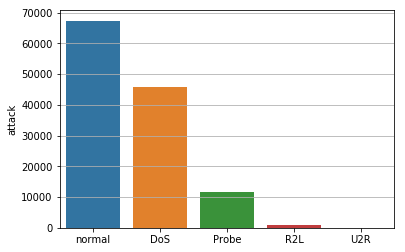

In [23]:
sns.barplot( output3_attack.index, output3_attack.attack )

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


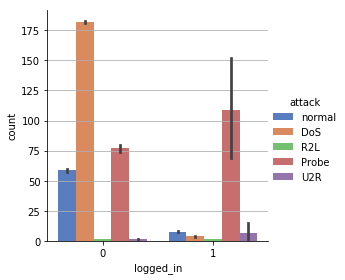

In [24]:
logged_in_count = output3[['logged_in', 'attack']].groupby(['logged_in', 'attack']).size().reset_index()
logged_in_count.columns = ['logged_in', 'attack', 'count']

sns.factorplot(x="logged_in", y = 'count', hue="attack", data = output3,
               size=4, kind="bar", palette="muted")

In [25]:
logged_in_count = output3[['logged_in', 'attack']].groupby(['logged_in', 'attack']).size()
logged_in_percent = logged_in_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()

In [26]:
logged_in_percent.columns = ['logged_in', 'attack', 'percent']

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


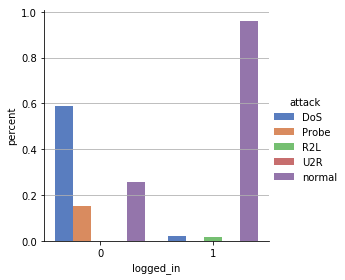

In [27]:
sns.factorplot(x="logged_in", y = 'percent', hue="attack", data=logged_in_percent,
               size=4, kind="bar", palette="muted")

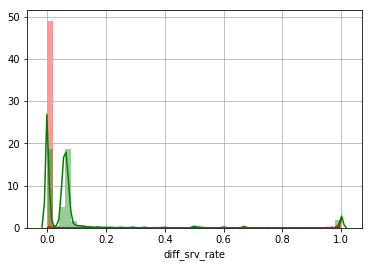

In [28]:
sns.distplot( output3[output3.logged_in == 1]['diff_srv_rate'], color = 'r')
sns.distplot( output3[output3.logged_in == 0]['diff_srv_rate'], color = 'g')

# identifying relationships (between Y & numerical independent variables by comparing means)

In [29]:
output3.groupby('y1').mean()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
y1,,,,,,,,,,,,,,,,,,,,,
1,0.006227,1176.321162,169.201537,0.000392,0.062229,0.000000,0.039889,0.000000,0.020837,0.019226,...,26.524005,0.123423,0.066333,0.049492,0.001647,0.747922,0.744434,0.157569,0.151286,19.311560
2,2074.858185,385679.838367,181074.911805,0.000000,0.000000,0.000000,0.001630,0.000343,0.007121,0.000601,...,42.367193,0.390825,0.401263,0.651840,0.187343,0.044757,0.039799,0.389717,0.441030,16.461050
3,633.417085,307727.300503,81822.026131,0.000000,0.000000,0.003015,8.334673,0.056281,0.913568,0.077387,...,42.440201,0.727377,0.021307,0.596915,0.085739,0.023849,0.015960,0.051116,0.047367,9.878392
4,80.942308,906.230769,5141.961538,0.000000,0.000000,0.019231,1.403846,0.019231,0.884615,1.211538,...,9.884615,0.781154,0.040000,0.568269,0.081154,0.000000,0.004808,0.039615,0.019038,4.403846
5,168.589899,13133.467064,4329.749517,0.000104,0.000000,0.000148,0.230658,0.001381,0.710656,0.507083,...,190.288215,0.811885,0.040134,0.121725,0.025996,0.013930,0.006117,0.046589,0.044699,20.315925


In [30]:
numeric_var_names=[key for key in dict(output3.dtypes) if dict(output3.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(output3.dtypes) if dict(output3.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag', 'y1']
['protocol_type', 'service', 'flag', 'attack']


In [31]:
output_num3=output3[numeric_var_names]
output_num3.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,y1
0,0,146,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,5
1,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,1
2,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,5
3,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,5
4,0,0,0,0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,1


In [32]:
output_num3.to_csv("output_num3.csv")

In [33]:
output_cat3 = output3[cat_var_names]
output_cat3.head()

,protocol_type,service,flag,attack
0,udp,other,SF,normal
1,tcp,private,S0,DoS
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,private,REJ,DoS


In [34]:
output_cat3.to_csv("output_cat3.csv")

# Creating Data audit Report

In [35]:
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=output_num3.apply(lambda x: var_summary(x)).T

In [36]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125972.0,0.0,3.617247e+07,287.146929,0.00,2.604526e+03,6.783553e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.58,4.290800e+04
src_bytes,125972.0,0.0,5.740179e+09,45567.100824,44.00,5.870354e+06,3.446106e+13,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125972.0,0.0,2.491634e+09,19779.271433,0.00,4.021285e+06,1.617073e+13,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.90,8314.00,25519.00,1.309937e+09
land,125972.0,0.0,2.500000e+01,0.000198,0.00,1.408613e-02,1.984190e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.0,2.858000e+03,0.022688,0.00,2.535310e-01,6.427796e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.0,1.400000e+01,0.000111,0.00,1.436608e-02,2.063844e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.0,2.575000e+04,0.204411,0.00,2.149977e+00,4.622401e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125972.0,0.0,1.540000e+02,0.001222,0.00,4.523932e-02,2.046596e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.0,4.985200e+04,0.395739,0.00,4.890107e-01,2.391315e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
num_compromised,125972.0,0.0,3.517800e+04,0.279253,0.00,2.394214e+01,5.732259e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03


In [37]:
num_summary.to_csv("num_summary10.csv")

In [38]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

output_num4=output_num3.apply(lambda x: outlier_capping(x))

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


In [39]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

output_num4=output_num3.apply(lambda x: Missing_imputation(x))

In [40]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

output_num4=output_num3.apply(lambda x: Missing_imputation(x))

In [41]:
output_num4.head().T

,0,1,2,3,4
duration,0.00,0.00,0.00,0.00,0.00
src_bytes,146.00,0.00,232.00,199.00,0.00
dst_bytes,0.00,0.00,8153.00,420.00,0.00
land,0.00,0.00,0.00,0.00,0.00
wrong_fragment,0.00,0.00,0.00,0.00,0.00
urgent,0.00,0.00,0.00,0.00,0.00
hot,0.00,0.00,0.00,0.00,0.00
num_failed_logins,0.00,0.00,0.00,0.00,0.00
logged_in,0.00,0.00,1.00,1.00,0.00
num_compromised,0.00,0.00,0.00,0.00,0.00


In [42]:
output_num4.to_csv("output_num4.csv")

In [43]:
output_num4.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,y1
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064219,0.042679,...,-0.116006,0.254195,0.228737,-0.026670,-0.064949,-0.064361,0.173815,0.199023,-0.156310,-0.016707
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,-0.022592,-0.003023
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,-0.018076,-0.002239
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.037038,-0.008343
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072419,-0.001044,...,-0.048734,0.059796,0.037177,-0.016252,-0.051917,-0.055918,0.028890,-0.033682,-0.157130,-0.105606
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.016411,0.005085
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002013,...,-0.036294,-0.012293,-0.034536,-0.024715,-0.058223,-0.058215,-0.030555,-0.031670,-0.160013,0.040849
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359,-0.073178,0.013342
logged_in,-0.064219,-0.003353,-0.002894,-0.011402,-0.072419,0.007299,0.116435,-0.006439,1.000000,0.014413,...,0.604056,-0.256067,-0.160994,-0.055955,-0.491484,-0.493270,-0.275974,-0.272809,0.269820,0.693780
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002013,0.019085,0.014413,1.000000,...,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219,-0.006101,0.010073


In [44]:
output_num4.corr().to_csv("output_num4.corr().csv")

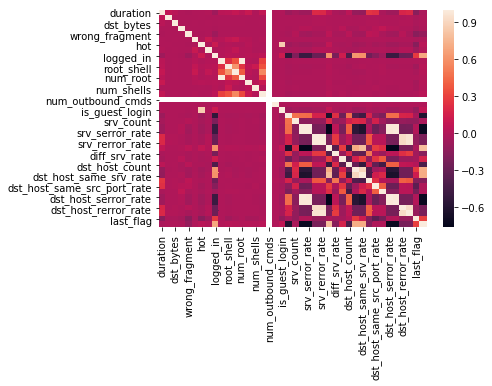

In [45]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(output_num4.corr())

In [46]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=output_cat3.apply(cat_summary)

In [47]:
cat_summary

,protocol_type,service,flag,attack
N,125972,125972,125972,125972
NMISS,0,0,0,0
ColumnsNames,tcp 102688 udp 14993 icmp 8291 N...,http 40338 private 21853 doma...,SF 74944 S0 34851 REJ 1123...,normal 67342 DoS 45927 Probe 1165...


In [48]:
cat_summary.to_csv("cat_summary.csv")

In [49]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    #col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [50]:
cat_var_names

['protocol_type', 'service', 'flag', 'attack']

In [51]:
#for c_feature in categorical_features
Train_cat_new = output_cat3
for c_feature in cat_var_names:
    Train_cat_new[c_feature] = Train_cat_new[c_feature].astype('category')
    Train_cat_new = create_dummies(Train_cat_new , c_feature )

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [52]:
Train_cat_new.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_Probe,attack_R2L,attack_U2R,attack_normal
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
output_new = pd.concat([output_num4, Train_cat_new], axis=1)

In [54]:
output_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_Probe,attack_R2L,attack_U2R,attack_normal
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
output_new.to_csv("output_new.csv")

In [56]:
output_new.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH',
       'attack_Probe', 'attack_R2L', 'attack_U2R', 'attack_normal'],
      dtype='object', length=125)

# Feature Selection
Dropping columns based on data audit report

- Based on low variance (near zero variance)
- High missings (>25% missings)
- High correlations between two numerical variables

In [57]:
output_new1 = output_new.drop(['num_outbound_cmds','is_host_login','land','urgent','num_shells','root_shell','su_attempted',
'num_failed_logins','is_guest_login','num_access_files','dst_host_srv_diff_host_rate','diff_srv_rate',
'dst_host_diff_srv_rate','wrong_fragment','srv_diff_host_rate','dst_host_rerror_rate','dst_host_same_src_port_rate',
'dst_bytes','dst_host_same_srv_rate','dst_host_srv_serror_rate','num_outbound_cmds','dst_host_serror_rate',
'duration','num_root','srv_rerror_rate','hot','srv_serror_rate','dst_host_srv_rerror_rate','rerror_rate','num_compromised',
'same_srv_rate','serror_rate','num_file_creations','src_bytes'], axis=1)
output_new1

,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,last_flag,y1,protocol_type_tcp,protocol_type_udp,service_X11,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_Probe,attack_R2L,attack_U2R,attack_normal
0,0,13,1,255,1,15,5,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,123,6,255,26,19,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,5,5,30,255,21,5,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,30,32,255,255,21,5,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,121,19,255,19,21,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,166,9,255,9,21,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,117,16,255,15,21,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,270,23,255,23,21,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,133,8,255,13,21,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,205,12,255,12,21,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
output_new1.to_csv("output_new1.csv")

In [59]:
output_new1.columns

Index(['logged_in', 'count', 'srv_count', 'dst_host_count',
       'dst_host_srv_count', 'last_flag', 'y1', 'protocol_type_tcp',
       'protocol_type_udp', 'service_X11', 'service_Z39_50', 'service_aol',
       'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns',
       'service_ctf', 'service_daytime', 'service_discard', 'service_domain',
       'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i',
       'service_efs', 'service_exec', 'service_finger', 'service_ftp',
       'service_ftp_data', 'service_gopher', 'service_harvest',
       'service_hostnames', 'service_http', 'service_http_2784',
       'service_http_443', 'service_http_8001', 'service_imap4',
       'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap',
       'service_link', 'service_login', 'service_mtp', 'service_name',
       'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn',
       'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u'

In [60]:
#Train_new = Train_new.loc[-Train_new.duplicated(),]
#Train_new

# Variable reduction using WOE or log(odds)

In [61]:
'''bp = PdfPages('WOE Plots.pdf')

for num_variable in Train_new.columns.difference(['y1']):
    binned = pd.cut(Train_new[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = Train_new.groupby(binned)['y1'].sum() / (Train_new.groupby(binned)['y1'].count()-Train_new.groupby(binned)['y1'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()'''

"bp = PdfPages('WOE Plots.pdf')\n\nfor num_variable in Train_new.columns.difference(['y1']):\n    binned = pd.cut(Train_new[num_variable], bins=10, labels=list(range(1,11)))\n    #binned = binned.dropna()\n    odds = Train_new.groupby(binned)['y1'].sum() / (Train_new.groupby(binned)['y1'].count()-Train_new.groupby(binned)['y1'].sum())\n    log_odds = np.log(odds)\n    fig,axes = plt.subplots(figsize=(10,4))\n    sns.barplot(x=log_odds.index,y=log_odds)\n    plt.ylabel('Log Odds Ratio')\n    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))\n    bp.savefig(fig)\n\nbp.close()"

# Variable Reduction using univariate Regression (short list based on Somer's D values)

In [62]:
output_new1.columns

Index(['logged_in', 'count', 'srv_count', 'dst_host_count',
       'dst_host_srv_count', 'last_flag', 'y1', 'protocol_type_tcp',
       'protocol_type_udp', 'service_X11', 'service_Z39_50', 'service_aol',
       'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns',
       'service_ctf', 'service_daytime', 'service_discard', 'service_domain',
       'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i',
       'service_efs', 'service_exec', 'service_finger', 'service_ftp',
       'service_ftp_data', 'service_gopher', 'service_harvest',
       'service_hostnames', 'service_http', 'service_http_2784',
       'service_http_443', 'service_http_8001', 'service_imap4',
       'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap',
       'service_link', 'service_login', 'service_mtp', 'service_name',
       'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn',
       'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u'

In [63]:
output_new2 =output_new1.loc[:,["logged_in","count","srv_count","dst_host_count","dst_host_srv_count","protocol_type_tcp","protocol_type_udp","last_flag","flag_REJ",
       "flag_RSTO", "flag_RSTOS0", "flag_RSTR", "flag_S0", "flag_S1","flag_S2", "flag_S3", "flag_SF", "flag_SH","service_X11", "service_Z39_50", "service_aol",
       "service_auth", "service_bgp", "service_courier", "service_csnet_ns","service_ctf", "service_daytime", "service_discard", "service_domain",
       "service_domain_u", "service_echo", "service_eco_i", "service_ecr_i","service_efs", "service_exec", "service_finger", "service_ftp", "service_ftp_data", "service_gopher", "service_harvest",
       "service_hostnames", "service_http", "service_http_2784","service_http_443", "service_http_8001", "service_imap4",
       "service_iso_tsap", "service_klogin", "service_kshell", "service_ldap","service_link", "service_login", "service_mtp", "service_name",
       "service_netbios_dgm", "service_netbios_ns", "service_netbios_ssn","service_netstat", "service_nnsp", "service_nntp", "service_ntp_u",
       "service_other", "service_pm_dump", "service_pop_2", "service_pop_3","service_printer", "service_private", "service_red_i",
       "service_remote_job", "service_rje", "service_shell", "service_smtp","service_sql_net", "service_ssh", "service_sunrpc", "service_supdup",
       "service_systat", "service_telnet", "service_tftp_u", "service_tim_i","service_time", "service_urh_i", "service_urp_i", "service_uucp",
       "service_uucp_path", "service_vmnet", "service_whois","y1"]]
output_new2

,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,protocol_type_tcp,protocol_type_udp,last_flag,flag_REJ,flag_RSTO,...,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,y1
0,0,13,1,255,1,0,1,15,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,123,6,255,26,1,0,19,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,5,5,30,255,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,5
3,1,30,32,255,255,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,121,19,255,19,1,0,21,1,0,...,0,0,0,0,0,0,0,0,0,1
5,0,166,9,255,9,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,117,16,255,15,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,270,23,255,23,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,133,8,255,13,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,205,12,255,12,1,0,21,1,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
output_new2.to_csv("output_new2.csv")

# Variable Reduction using Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [65]:
output_new3 =output_new2.loc[:,["logged_in","count","srv_count","dst_host_count","dst_host_srv_count","protocol_type_tcp","protocol_type_udp","last_flag","flag_REJ",
       "flag_RSTO", "flag_RSTOS0", "flag_RSTR", "flag_S0", "flag_S1","flag_S2", "flag_S3", "flag_SF", "flag_SH","service_X11", "service_Z39_50", "service_aol",
       "service_auth", "service_bgp", "service_courier", "service_csnet_ns","service_ctf", "service_daytime", "service_discard", "service_domain",
       "service_domain_u", "service_echo", "service_eco_i", "service_ecr_i","service_efs", "service_exec", "service_finger", "service_ftp", "service_ftp_data", "service_gopher", "service_harvest",
       "service_hostnames", "service_http", "service_http_2784","service_http_443", "service_http_8001", "service_imap4",
       "service_iso_tsap", "service_klogin", "service_kshell", "service_ldap","service_link", "service_login", "service_mtp", "service_name",
       "service_netbios_dgm", "service_netbios_ns", "service_netbios_ssn","service_netstat", "service_nnsp", "service_nntp", "service_ntp_u",
       "service_other", "service_pm_dump", "service_pop_2", "service_pop_3","service_printer", "service_private", "service_red_i",
       "service_remote_job", "service_rje", "service_shell", "service_smtp","service_sql_net", "service_ssh", "service_sunrpc", "service_supdup",
       "service_systat", "service_telnet", "service_tftp_u", "service_tim_i","service_time", "service_urh_i", "service_urp_i", "service_uucp",
       "service_uucp_path", "service_vmnet", "service_whois","y1"]]
output_new3.head()

,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,protocol_type_tcp,protocol_type_udp,last_flag,flag_REJ,flag_RSTO,...,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,y1
0,0,13,1,255,1,0,1,15,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,123,6,255,26,1,0,19,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,5,5,30,255,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,5
3,1,30,32,255,255,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,121,19,255,19,1,0,21,1,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
output_new3.to_csv("output_new3.csv")

In [67]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = output_new3[output_new3.columns.difference(['y1'])]
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X, output_new3[['y1']] )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\R

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\RAMKUMAR\Documents\Python

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\RAMKUMAR\Documents\Python

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\RAMKUMAR\Documents\Python

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\RAMKUMAR\Documents\Python

[False False False False False  True  True  True False False False False
  True False False False False  True False False False False False False
 False False False False  True False  True False False False False  True
  True False False False  True False False False False False False False
 False False False False False False False False False False False  True
  True False False False False False False False False False  True False
 False False False False  True False False False False  True False False
 False False False]
[65 73 71  5  3  1  1  1 10 57 56 11  1 63  7 53  8  1 13 66 61 14 17 22
 29 49 44 64  1 47  1  4 21 43 59  1  1 12 55 27  1 68 16 54  2 19 33 32
 23 37 25 40 36 35 30 26 48 15 38  1  1 67 52  9 42  6 70 45 46 50  1 41
 51 39 34 31  1 62 60 58 72  1 24 18 20 28 69]


In [68]:
X.columns

Index(['count', 'dst_host_count', 'dst_host_srv_count', 'flag_REJ',
       'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1',
       'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH', 'last_flag', 'logged_in',
       'protocol_type_tcp', 'protocol_type_udp', 'service_X11',
       'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp',
       'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime',
       'service_discard', 'service_domain', 'service_domain_u', 'service_echo',
       'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec',
       'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher',
       'service_harvest', 'service_hostnames', 'service_http',
       'service_http_2784', 'service_http_443', 'service_http_8001',
       'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell',
       'service_ldap', 'service_link', 'service_login', 'service_mtp',
       'service_name', 'service_netbios_dgm', 'service_ne

In [69]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, rfe.get_support())]

feature_map

#Alternative of capturing the important variables
RFE_features=X.columns[rfe.get_support()]

selected_features_from_rfe = X[RFE_features]

In [70]:
RFE_features

Index(['flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_SH', 'service_X11',
       'service_domain_u', 'service_eco_i', 'service_ftp', 'service_ftp_data',
       'service_http', 'service_ntp_u', 'service_other', 'service_smtp',
       'service_telnet', 'service_urp_i'],
      dtype='object')

# Variable reduction using Select K-Best technique

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [72]:
X = output_new3[output_new3.columns.difference(['y1'])]
X_new = SelectKBest(f_classif, k=15).fit(X, output_new3[['y1']] )

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
X_new.get_support()

array([ True,  True,  True, False, False, False,  True,  True, False,
       False, False,  True, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [74]:
X_new.scores_

array([2.14280897e+04, 9.43281537e+03, 3.46257093e+04, 1.66050532e+03,
       3.34946711e+02, 2.54784053e+02, 5.65935162e+03, 5.51308797e+04,
       7.62272958e+01, 2.08990591e+01, 1.29551542e+01, 5.68123276e+04,
       6.48704199e+02, 2.01459980e+04, 3.19608083e+04, 3.07926970e+03,
       1.93983363e+03, 1.18510234e+01, 3.67695514e+02, 4.90438745e+00,
       1.45872774e+02, 2.99329576e+02, 3.14041606e+02, 2.24448213e+02,
       2.17228139e+02, 2.06617859e+02, 2.14116711e+02, 1.74182975e+02,
       2.26310868e+03, 1.68411340e+02, 1.27168376e+04, 1.10375147e+03,
       2.04153607e+02, 1.96715627e+02, 1.74112996e+02, 1.75688927e+03,
       2.05188327e+03, 1.89466686e+02, 4.90438745e+00, 1.85600381e+02,
       1.46152878e+04, 2.45198333e+00, 2.24155883e+02, 4.90438745e+00,
       2.58120869e+02, 2.87740562e+02, 1.79823899e+02, 1.21989312e+02,
       1.70918637e+02, 1.83048143e+02, 1.76893734e+02, 1.65248467e+02,
       1.70457472e+02, 1.61383617e+02, 1.38268004e+02, 1.42527227e+02,
      

In [75]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, X_new.get_support())]

feature_map

#Alternative of capturing the important variables
KBest_features=X.columns[X_new.get_support()]

selected_features_from_KBest = X[KBest_features]

In [76]:
KBest_features

Index(['count', 'dst_host_count', 'dst_host_srv_count', 'flag_RSTR', 'flag_S0',
       'flag_SF', 'last_flag', 'logged_in', 'protocol_type_tcp',
       'protocol_type_udp', 'service_domain_u', 'service_eco_i',
       'service_ftp_data', 'service_http', 'service_private'],
      dtype='object')

# Variance Inflation Factor assessment

In [77]:
X = pd.concat([output_new3[output_new3.columns.difference(['y1'])],output_new3['y1']], axis=1)
features = "+".join(output_new3.columns.difference(['y1']))
X.head()

,count,dst_host_count,dst_host_srv_count,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,...,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,srv_count,y1
0,13,255,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5
1,123,255,26,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,1
2,5,30,255,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,5
3,30,255,255,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,5
4,121,255,19,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,19,1


In [78]:
X.to_csv("X1.csv")

In [79]:
features

'count+dst_host_count+dst_host_srv_count+flag_REJ+flag_RSTO+flag_RSTOS0+flag_RSTR+flag_S0+flag_S1+flag_S2+flag_S3+flag_SF+flag_SH+last_flag+logged_in+protocol_type_tcp+protocol_type_udp+service_X11+service_Z39_50+service_aol+service_auth+service_bgp+service_courier+service_csnet_ns+service_ctf+service_daytime+service_discard+service_domain+service_domain_u+service_echo+service_eco_i+service_ecr_i+service_efs+service_exec+service_finger+service_ftp+service_ftp_data+service_gopher+service_harvest+service_hostnames+service_http+service_http_2784+service_http_443+service_http_8001+service_imap4+service_iso_tsap+service_klogin+service_kshell+service_ldap+service_link+service_login+service_mtp+service_name+service_netbios_dgm+service_netbios_ns+service_netbios_ssn+service_netstat+service_nnsp+service_nntp+service_ntp_u+service_other+service_pm_dump+service_pop_2+service_pop_3+service_printer+service_private+service_red_i+service_remote_job+service_rje+service_shell+service_smtp+service_sql_n

In [80]:
#count+dst_host_count+dst_host_srv_count+last_flag+srv_count+dst_host_srv_count+flag_SF+logged_in+count+flag_S0+service_http+last_flag+dst_host_count+service_private+protocol_type_udp+service_domain_u+flag_REJ+service_smtp+attack_Probe+       flag_S0+       service_ecr_i+       y1_no2+ attack_R2L+ logged_in+ service_http+ y1_no3+ attack_normal+ protocol_type_tcp+ service_private+ flag_REJ+ service_eco_i+ service_smtp+ flag_RSTO+attack_Probe+       dst_host_srv_count+       protocol_type_udp+       service_private+ attack_normal+ flag_S0+ service_domain_u+ service_smtp+ count+ flag_SF+ service_http+ y1_no2+ dst_host_count+ last_flag+ logged_in


In [81]:
a,b = dmatrices(formula_like='y1 ~ '+ 'dst_host_count+last_flag+last_flag+dst_host_count+service_private+service_smtp+ service_private+ service_eco_i+ service_smtp+ flag_RSTO+ service_private+ service_domain_u+ service_smtp+ count+ dst_host_count+ last_flag', data = output_new2, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

   VIF Factor          features
0   88.243816         Intercept
1    1.466163    dst_host_count
2    1.101533         last_flag
3    1.116964   service_private
4    1.055851      service_smtp
5    1.218442     service_eco_i
6    1.013048         flag_RSTO
7    1.056176  service_domain_u
8    1.316408             count


# Model Building

In [82]:
import statsmodels.formula.api as sm
import sklearn.metrics as metrics

In [83]:
# Required Python Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Train

In [84]:
#for logistic regression using statsmodels
train, test = train_test_split(output_new3, test_size=0.3, random_state=0)

In [85]:
train_x = train[['dst_host_count','last_flag','service_private','service_smtp','flag_RSTO','count']]
train_y = train['y1']
lr = LogisticRegression()
lr.fit(train_x, train_y)
preds = lr.predict(train_x)

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [86]:
preds

array([5, 2, 1, ..., 1, 1, 1], dtype=int64)

In [87]:
LogisticRegression(multi_class='multinomial',solver ='newton-cg').fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
from sklearn.metrics import accuracy_score

accuracy_score(train_y, preds)

0.8097981401678385

In [89]:
train_x = np.array(train[['dst_host_count','last_flag','service_private','service_smtp','flag_RSTO','count']])
train_y = np.array(train['y1'])

mul_lr = linear_model.LogisticRegression(multi_class='multinomial',
                                         solver='newton-cg').fit(train_x, train_y)

print(mul_lr.intercept_)
print(mul_lr.coef_)

[ -4.28632529   3.74273733   6.10294548   4.65784489 -10.2172024 ]
[[ 1.04975000e-02  2.85100283e-01  1.45256406e+00  1.63286152e+00
   1.27140832e+00  1.23009476e-01]
 [-1.93569367e-03 -1.01768481e-01  2.50701571e+00 -6.10880331e-02
  -6.35661995e-01  1.22250979e-01]
 [-6.09129056e-04 -3.50684255e-01 -1.98364312e+00 -3.14457205e+00
  -2.18437778e-01 -4.77623160e-01]
 [-1.22220835e-02 -5.92443414e-01 -1.82168160e-01 -1.65730901e+00
  -2.51155081e-01  1.24942002e-01]
 [ 4.26940588e-03  7.59795867e-01 -1.79376848e+00  3.23010758e+00
  -1.66153466e-01  1.07420703e-01]]


In [90]:
# Train multinomial logistic regression model
train_x = np.array(train[['dst_host_count','last_flag','service_private','service_smtp','flag_RSTO','count']])
train_y = np.array(train['y1'])
lr = linear_model.LogisticRegression()
lr.fit(train_x, train_y)
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(train_x, train_y)
Logistic_regression_Train_Accuracy = metrics.accuracy_score(train_y,lr.predict(train_x))
Multinomial_Logistic_regression_Train_Accuracy = metrics.accuracy_score(train_y, mul_lr.predict(train_x))

print("Logistic regression Train Accuracy: ",Logistic_regression_Train_Accuracy)
#print "Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, lr.predict(test_x))
    
print("Multinomial Logistic regression Train Accuracy: ",Multinomial_Logistic_regression_Train_Accuracy)
#print "Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, mul_lr.predict(test_x))
 

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic regression Train Accuracy:  0.8097981401678385
Multinomial Logistic regression Train Accuracy:  0.8221819006577455


# Test

In [91]:
test_x = test[['dst_host_count','last_flag','service_private','service_smtp','flag_RSTO','count']]
test_y = test['y1']
lr = LogisticRegression()
lr.fit(test_x, test_y)
preds = lr.predict(test_x)

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [92]:
preds

array([1, 1, 5, ..., 1, 5, 5], dtype=int64)

In [93]:
LogisticRegression(multi_class='multinomial',solver ='newton-cg').fit(test_x, test_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [94]:
from sklearn.metrics import accuracy_score

accuracy_score(test_y, preds)

0.8080281541066893

In [95]:
test_x = np.array(test[['dst_host_count','last_flag','service_private','service_smtp','flag_RSTO','count']])
test_y = np.array(test['y1'])

mul_lr = linear_model.LogisticRegression(multi_class='multinomial',
                                         solver='newton-cg').fit(test_x, test_y)

print(mul_lr.intercept_)
print(mul_lr.coef_)

[ -4.52960785   3.2635868    6.11013956   5.43293505 -10.27705355]
[[ 9.33451532e-03  2.92063309e-01  1.22418316e+00  1.41651902e+00
   1.28800318e+00  3.05980611e-01]
 [-2.77689725e-03 -8.74861868e-02  2.40464626e+00 -3.39104290e-01
  -3.18747664e-01  3.04982719e-01]
 [-2.50429412e-03 -3.60393616e-01 -1.51337477e+00 -2.57815116e+00
  -9.82305732e-02 -2.94465757e-01]
 [-7.63238012e-03 -5.98306641e-01 -7.22790885e-02 -1.49385062e+00
  -2.82563945e-01 -6.06758707e-01]
 [ 3.57905594e-03  7.54123134e-01 -2.04317556e+00  2.99458705e+00
  -5.88461002e-01  2.90261135e-01]]


In [96]:
# Test multinomial logistic regression model
test_x = np.array(test[['dst_host_count','last_flag','service_private','service_smtp','flag_RSTO','count']])
test_y = np.array(test['y1'])
lr = linear_model.LogisticRegression()
lr.fit(test_x, test_y)
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(test_x, test_y)
Logistic_regression_test_Accuracy = metrics.accuracy_score(test_y,lr.predict(test_x))
Multinomial_Logistic_regression_test_Accuracy = metrics.accuracy_score(test_y, mul_lr.predict(test_x))
print("Logistic regression test Accuracy: ",Logistic_regression_test_Accuracy)
#print "Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, lr.predict(test_x))    
print("Multinomial Logistic regression test Accuracy: ",Multinomial_Logistic_regression_test_Accuracy)
#print "Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, mul_lr.predict(test_x))

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic regression test Accuracy:  0.8080281541066893
Multinomial Logistic regression test Accuracy:  0.8190622353937341


# Multinomial logistic regression using Random forest, SVM,ANN

In [97]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [98]:
train_x = np.array(train[['dst_host_count','last_flag','service_private','service_smtp','flag_RSTO','count']])
train_y = np.array(train['y1'])

test_x = np.array(test[['dst_host_count','last_flag','service_private','service_smtp','flag_RSTO','count']])
test_y = np.array(test['y1'])

In [99]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(train_x,train_y)
LR.predict(test_x)
round(LR.score(test_x,test_y), 4)

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8052

In [100]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(train_x,train_y)
RF.predict(test_x)
round(RF.score(test_x,test_y), 4)

0.9241

In [101]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(train_x,train_y)
NN.predict(test_x)
round(NN.score(test_x,test_y), 4)

0.8277